# Hire-a-thon Problem Statement
•Source: This dataset belongs to the BFSI Sector. The data has been fully masked in order to avoid any conflict of interest between the company and the Hire-a-thon. 

•Domain- specific knowledge: We don’t want anyone to have advantage based on his/her domain specific knowledge, due to which we have even masked the columns names. The competition is designed to test your knowledge of Machine Learning in areas like Pre-processing, Feature Engineering, Feature Selection, Model Selection, Model Evaluation, Metrics etc.

•Objective: Accurately predict ‘Dependent_Variable’

•Dataset


    1. X_train
        a. Unique_ID: Represent the Unique Identifier
        b. C1 to C8: Represents Categorical Columns, which are already encoded into numeric representation
        c. N1 to N35: Represent Numerical Columns
    2. y_train
        a. Unique_ID: Represent the Unique Identifier
        b. Dependent_Variable: Represent the outcome or dependent variable

•Metrics: ROC_AUC Score 


    1.Documentation: 
        a. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
        b. http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

    2. Sample Code to calculate it in Python:
        from sklearn.metrics import roc_auc_score, auc
        fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)
        auc_algo =  auc(fpr, tpr)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
X = pd.read_csv('Training/X_train.csv',index_col='Unique_ID')
y = pd.read_csv('Training/y_train.csv',index_col='Unique_ID')
X.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
Unique_ID,,,,,,,,,,,,,,,,,,,,,
Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [3]:
X_test = pd.read_csv('Test/X_test.csv',index_col='Unique_ID')

In [4]:
y.head()

,Dependent_Variable
Unique_ID,
Candidate_5926,1
Candidate_48134,0
Candidate_51717,1
Candidate_26401,0
Candidate_34872,0


### Shape

total of 43 columns , 8 are categorical and 35 are Numerical

a number of 33050 as data points

In [5]:
X.shape, y.shape

((33050, 43), (33050, 1))

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33050 entries, Candidate_5926 to Candidate_4714
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      33050 non-null  int64  
 1   C2      33050 non-null  int64  
 2   C3      33050 non-null  int64  
 3   C4      33050 non-null  int64  
 4   C5      33050 non-null  int64  
 5   C6      33050 non-null  bool   
 6   C7      33050 non-null  int64  
 7   C8      33050 non-null  bool   
 8   N1      33050 non-null  float64
 9   N2      28438 non-null  float64
 10  N3      32685 non-null  float64
 11  N4      28444 non-null  float64
 12  N5      28444 non-null  float64
 13  N6      32685 non-null  float64
 14  N7      32623 non-null  float64
 15  N8      33050 non-null  int64  
 16  N9      33050 non-null  int64  
 17  N10     32623 non-null  float64
 18  N10.1   32623 non-null  float64
 19  N11     32334 non-null  float64
 20  N12     28436 non-null  float64
 21  N14     32442 non-

### Stats


In [7]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,33050.0,1.119818,0.399382,1.000,1.000000,1.000000,1.0000,3.000000e+00
C2,33050.0,2.403873,3.399024,0.000,0.000000,1.000000,3.0000,2.000000e+01
C3,33050.0,12.856097,12.013457,0.000,2.000000,10.000000,20.0000,5.100000e+01
C4,33050.0,14.437398,15.527474,0.000,1.000000,10.000000,26.0000,6.700000e+01
C5,33050.0,1.719395,1.320860,0.000,1.000000,2.000000,2.0000,7.000000e+00
C7,33050.0,3.124932,2.158905,0.000,1.000000,4.000000,4.0000,7.000000e+00
N1,33050.0,19.976530,8.110870,0.000,13.450000,19.275000,26.9000,4.800000e+01
N2,28438.0,81.342710,85.397795,0.000,21.000000,53.000000,112.0000,7.550000e+02
N3,32685.0,3.359361,0.411040,0.000,3.200000,3.400000,3.6000,4.400000e+00
N4,28444.0,9.574075,5.584756,0.000,6.000000,9.000000,13.0000,5.900000e+01


### Missing values

NO missing values in categorical variables

N25-N32 almost 2/3 missing values, for rest in decent range

In [8]:
X.isnull().sum()

C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
N1           0
N2        4612
N3         365
N4        4606
N5        4606
N6         365
N7         427
N8           0
N9           0
N10        427
N10.1      427
N11        716
N12       4614
N14        608
N15        427
N16       4606
N17       4606
N18       4606
N19       4571
N20       4571
N21       4571
N22       4571
N23       2486
N24          0
N25      26779
N26      26779
N27      26779
N28      26779
N29      26779
N30      26779
N31      26779
N32      26830
N33          0
N34          0
N35        427
dtype: int64

### Imbalanced Dataset

class 0: class 1 = 2.2:1

Can use weights per class in training to help with prediction

Smote can be used to balanace the dataset for X_train, y_train

In [9]:
y.value_counts()

Dependent_Variable
0                     22844
1                     10206
dtype: int64

### Univariate Analysis

#### Categorical variables


C2: 21, C3: 52, C4: 68 are cardinality for thise categorical variables 

Except for C6(which has equal counts for two different ones) but for rest only few categories (less than 4) are  more than rest many

In [10]:
col = list(X.columns)

********************************************************************************
C1: Col bar plot
Cardinality:3


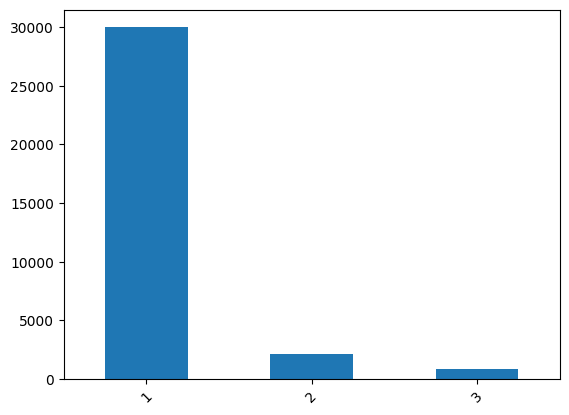

********************************************************************************
C2: Col bar plot
Cardinality:21


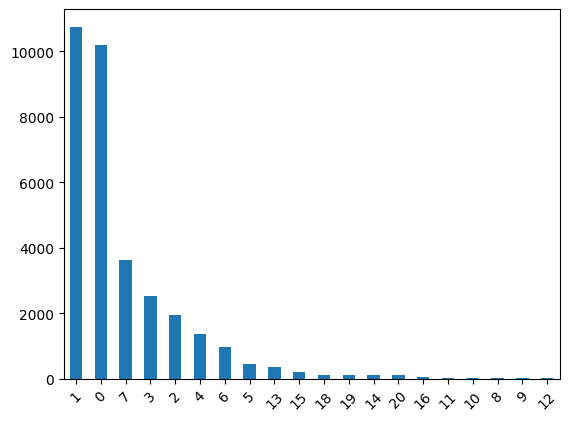

********************************************************************************
C3: Col bar plot
Cardinality:52


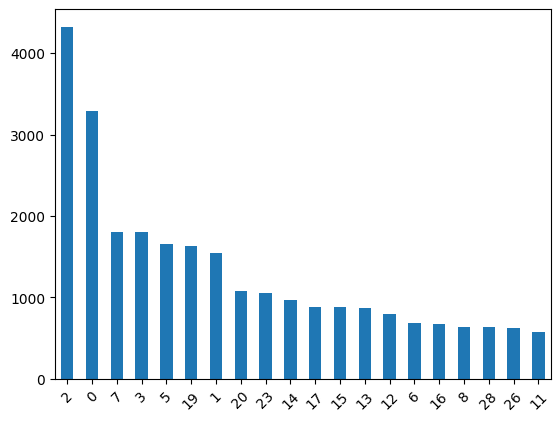

********************************************************************************
C4: Col bar plot
Cardinality:68


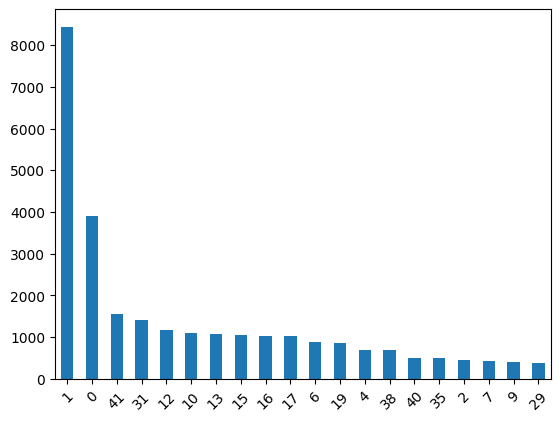

********************************************************************************
C5: Col bar plot
Cardinality:8


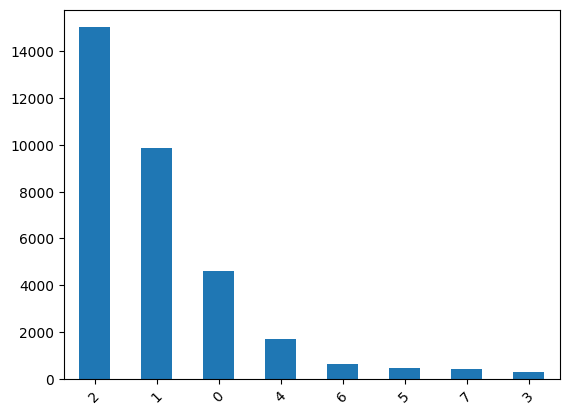

********************************************************************************
C6: Col bar plot
Cardinality:2


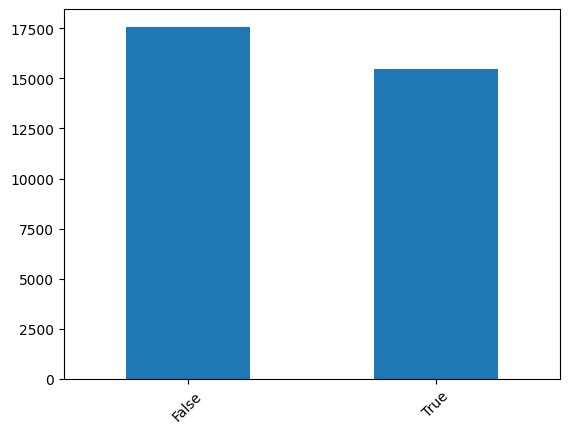

********************************************************************************
C7: Col bar plot
Cardinality:8


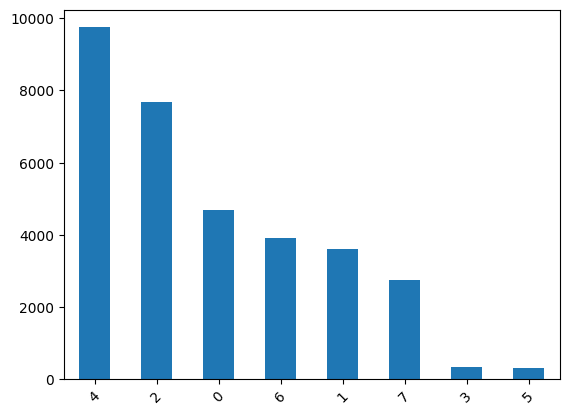

********************************************************************************
C8: Col bar plot
Cardinality:2


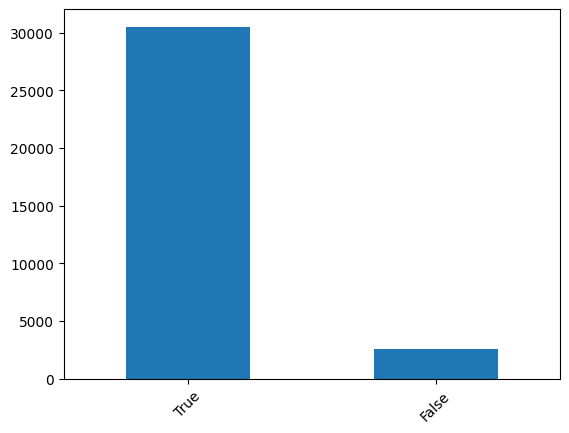

In [11]:
for el in col:
    if el.startswith('C'):
        print('*'*80)
        print(el+ ': Col bar plot')
        temp = X[el].value_counts()
        print('Cardinality:'+ str(len(temp)))
        temp[:20].plot(kind='bar')
        plt.xticks(rotation= 45)
        plt.show()

#### Numerical variables

N2, N4, N5, N7. N8, N20,N21 are right skewed distribution small values quantity more than larger values

N3, N6 are left skewed distribution large values quantity more than smaller ones

N9-N17 , N19,N23,N24 are almost following parity distribution 


********************************************************************************
N1


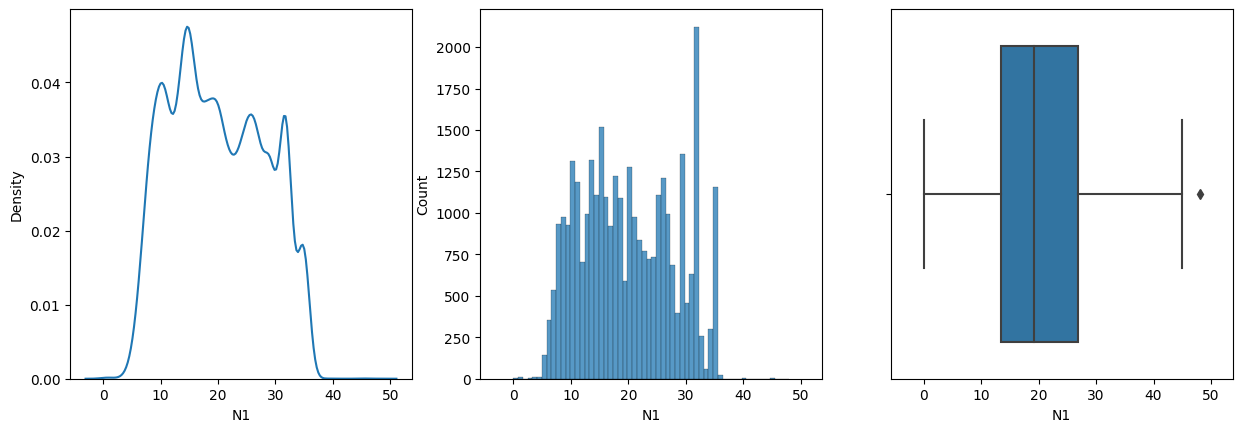

********************************************************************************
N2


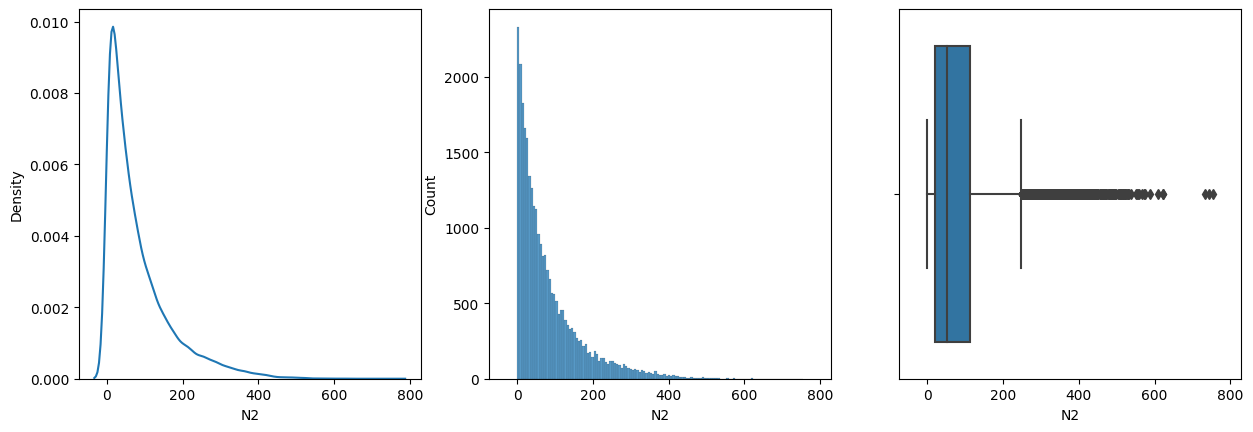

********************************************************************************
N3


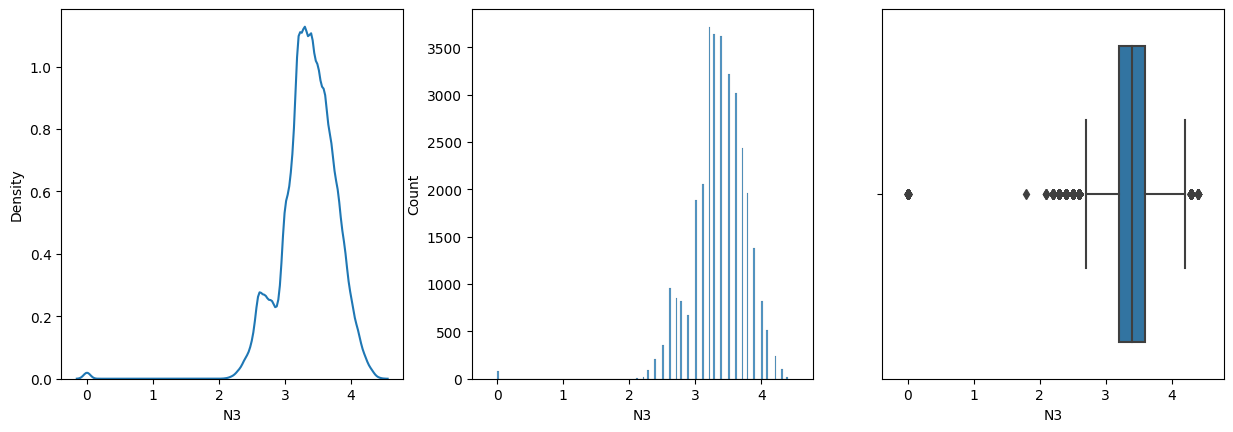

********************************************************************************
N4


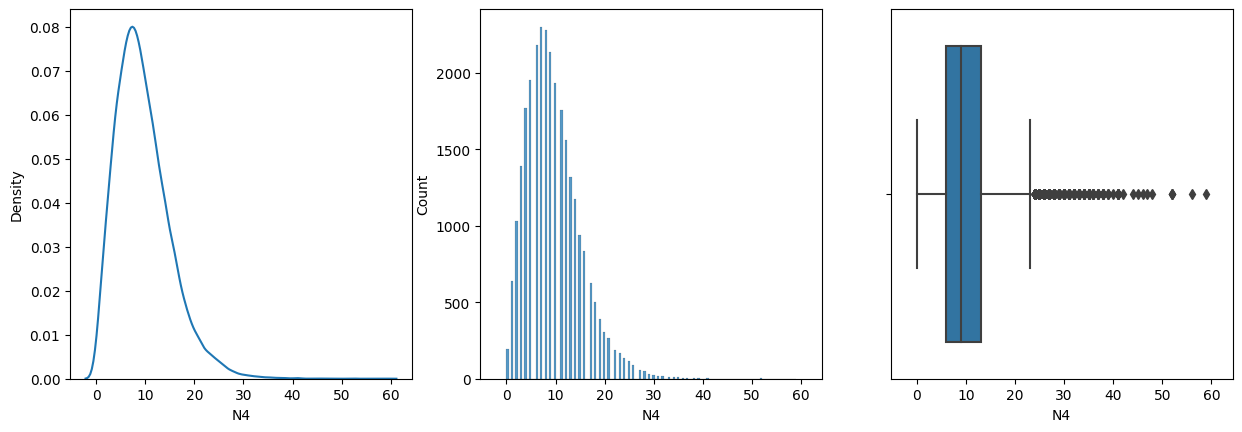

********************************************************************************
N5


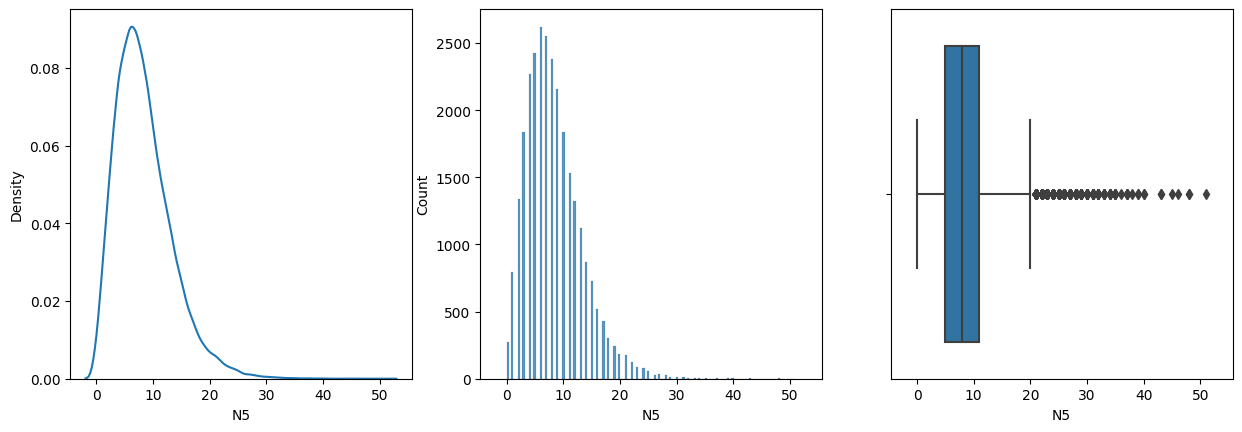

********************************************************************************
N6


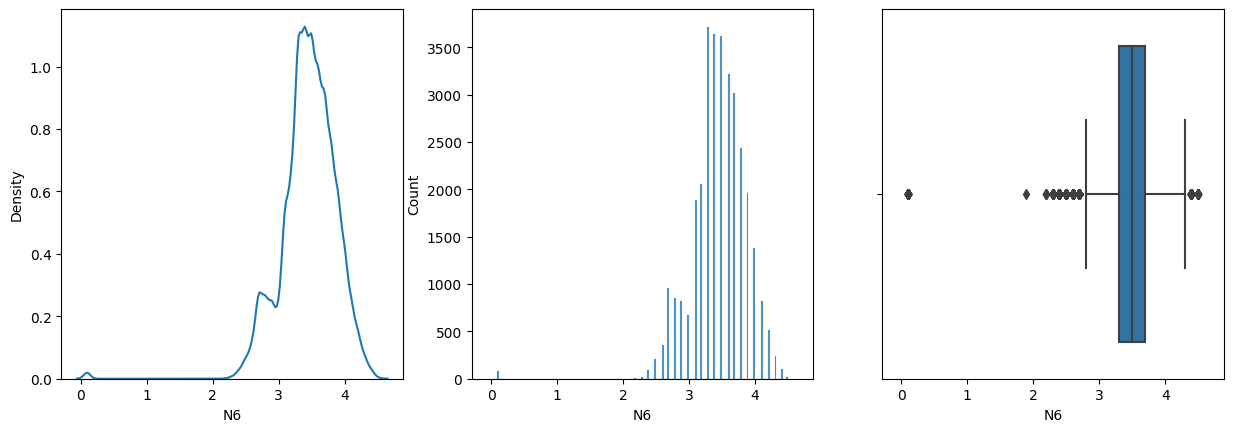

********************************************************************************
N7


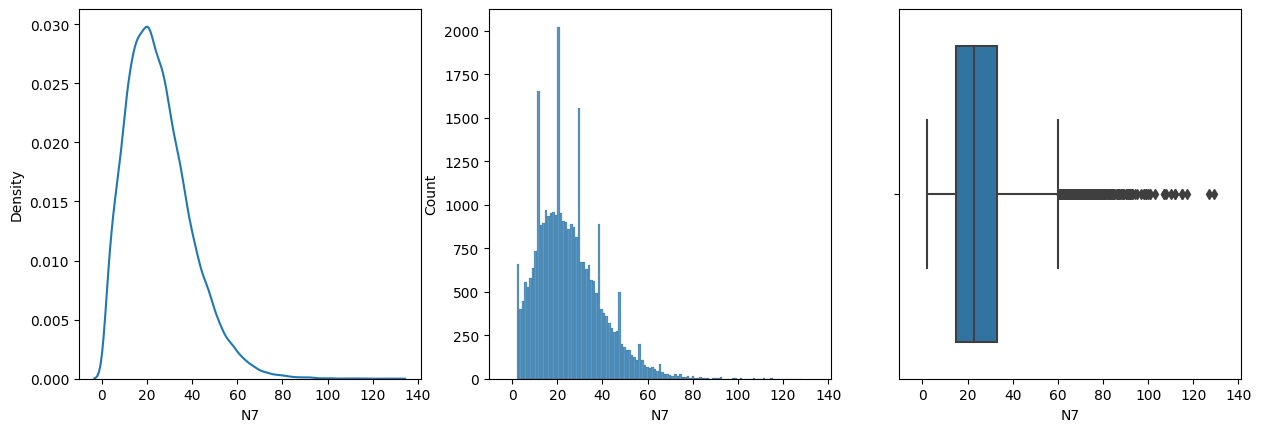

********************************************************************************
N8


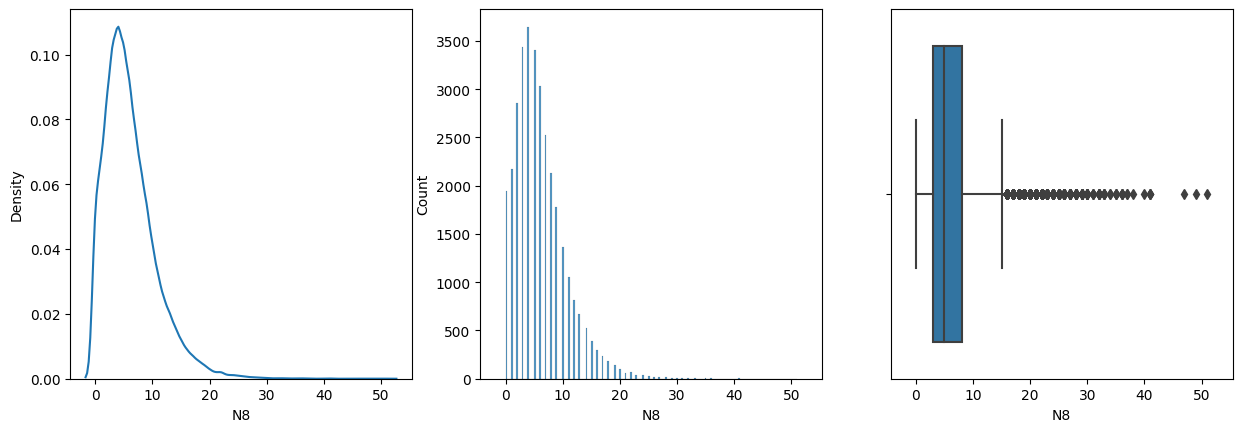

********************************************************************************
N9


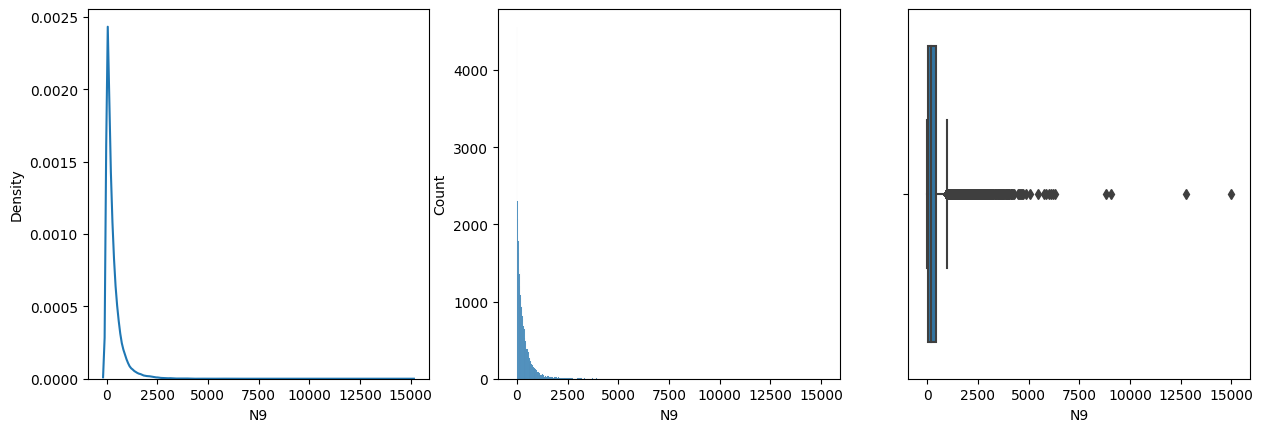

********************************************************************************
N10


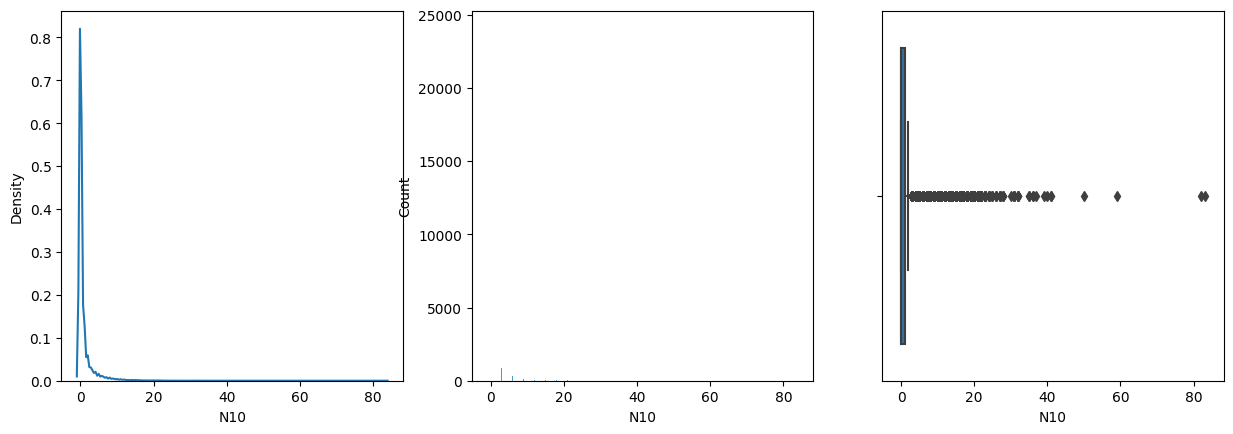

********************************************************************************
N10.1


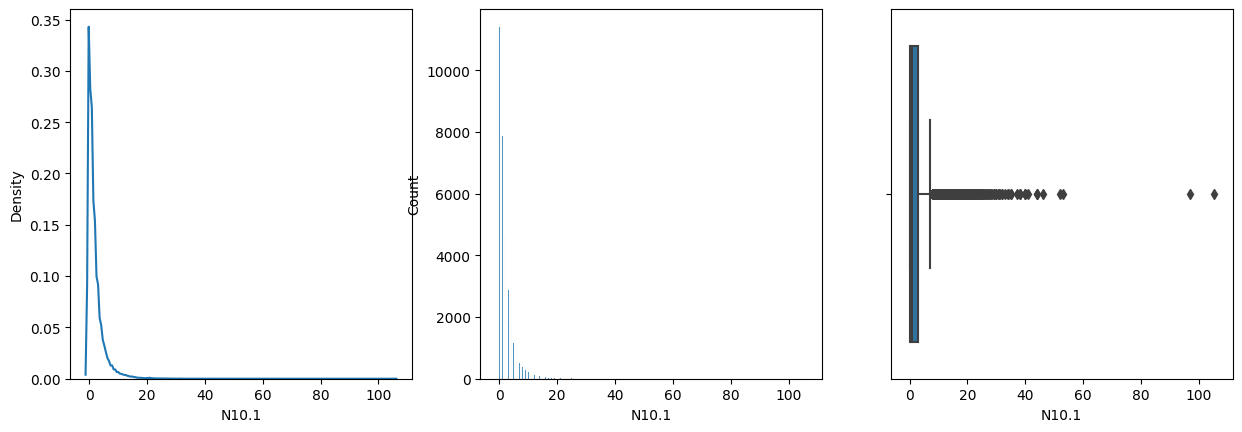

********************************************************************************
N11


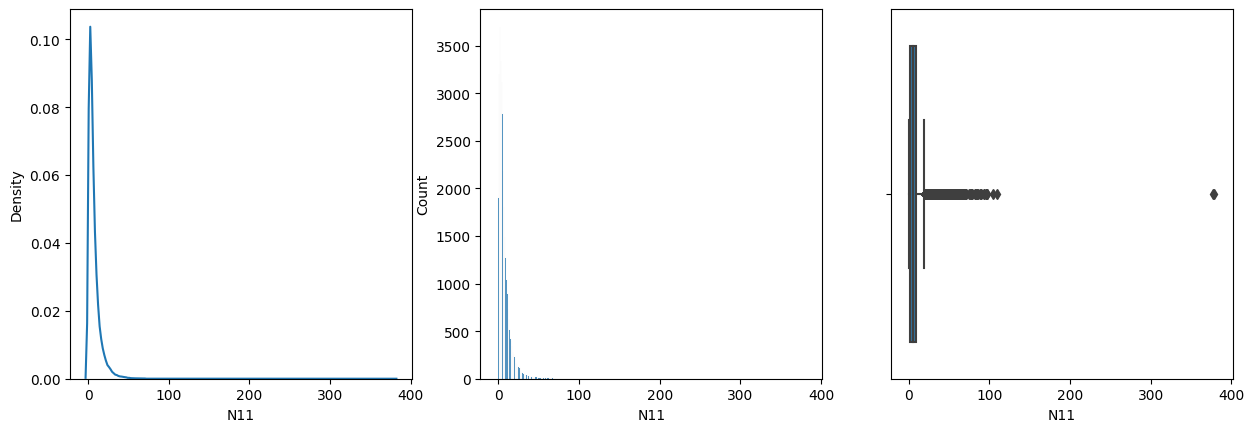

********************************************************************************
N12


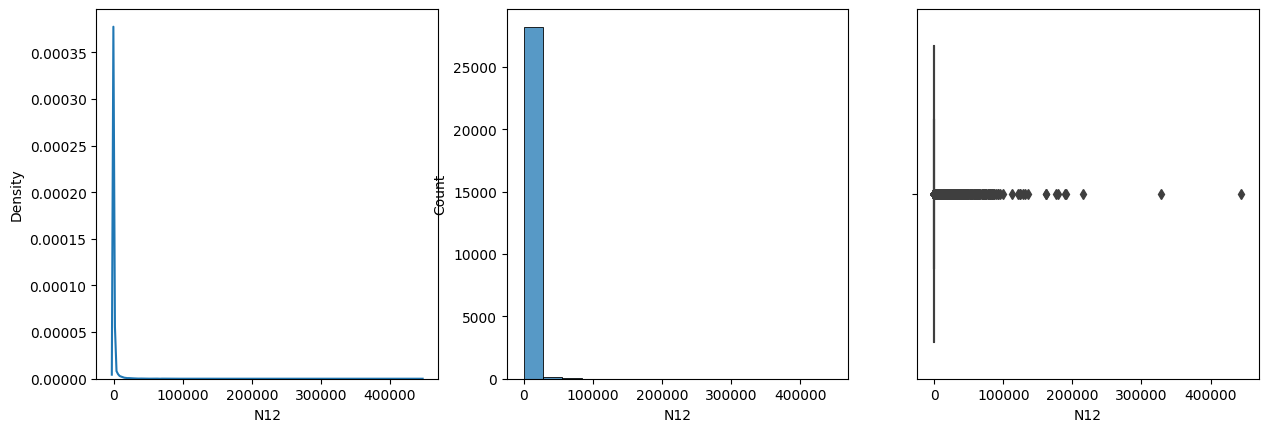

********************************************************************************
N14


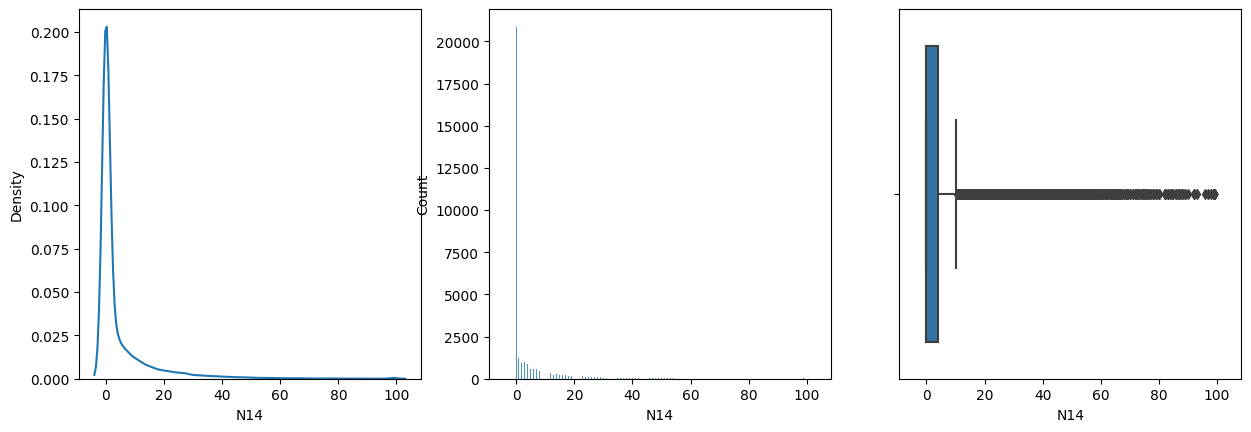

********************************************************************************
N15


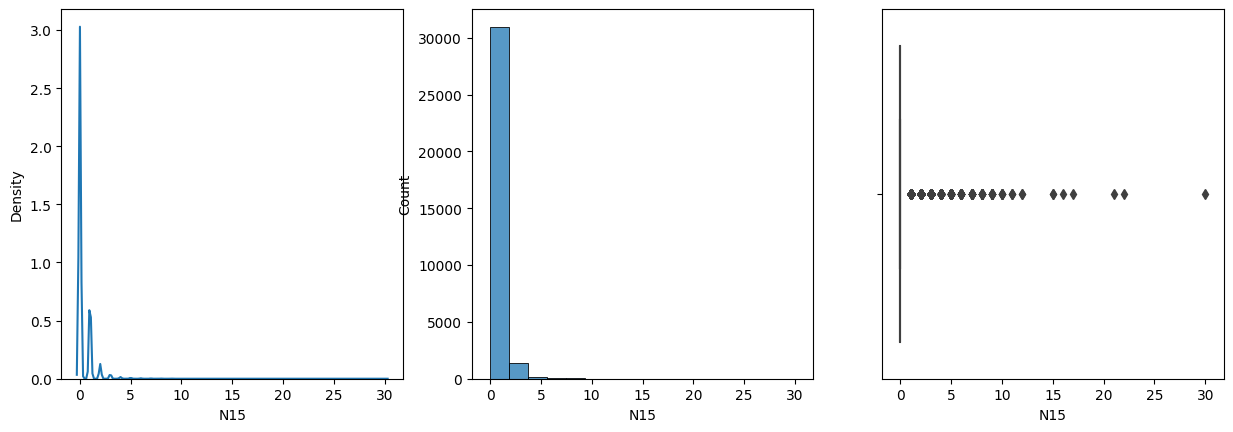

********************************************************************************
N16


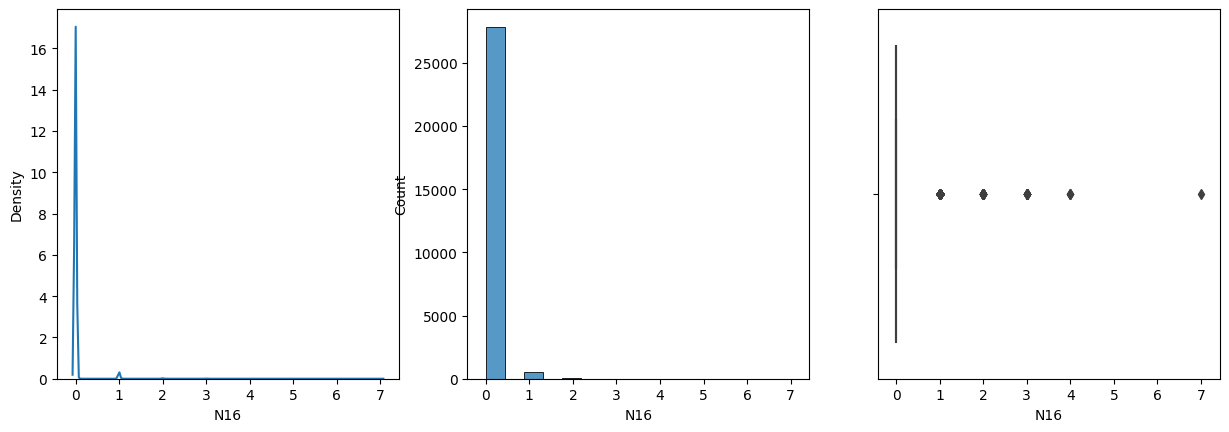

********************************************************************************
N17


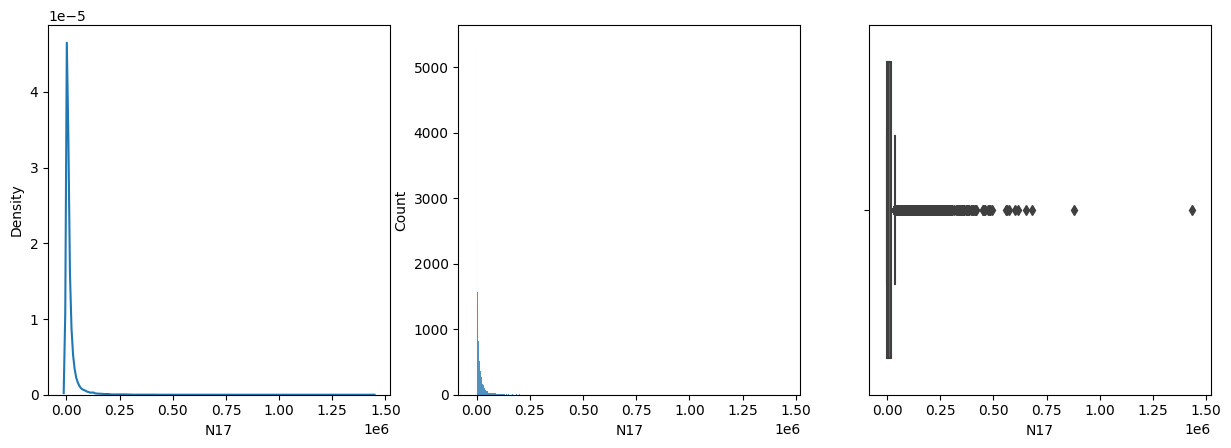

********************************************************************************
N18


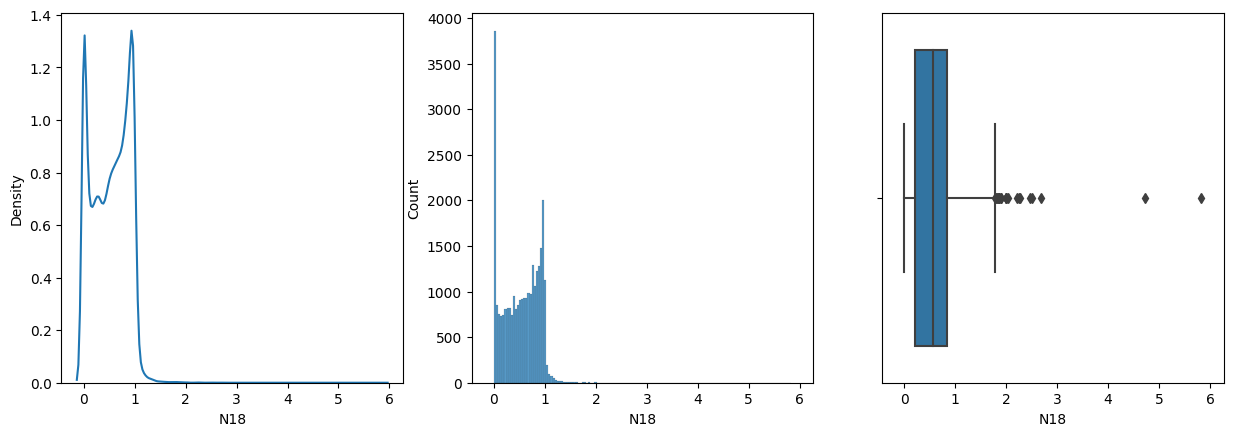

********************************************************************************
N19


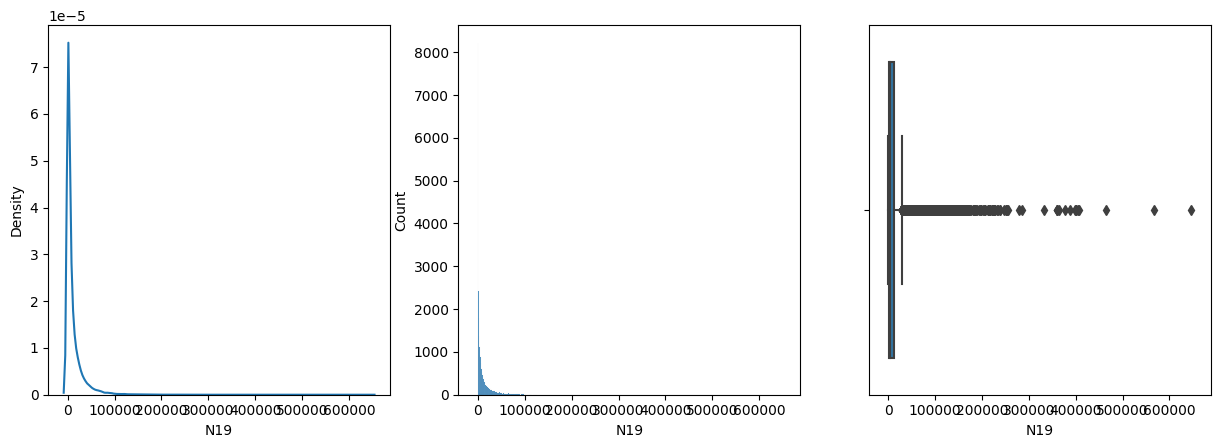

********************************************************************************
N20


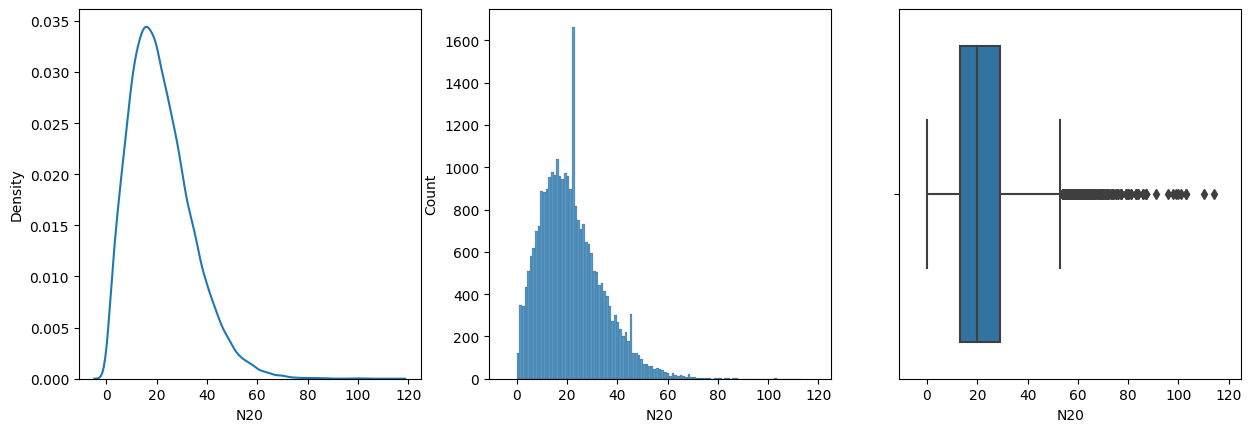

********************************************************************************
N21


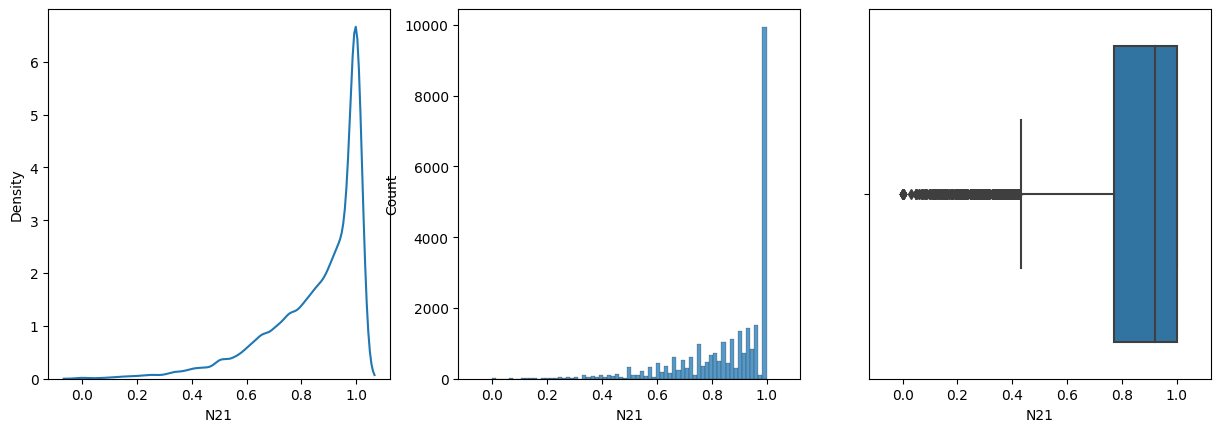

********************************************************************************
N22


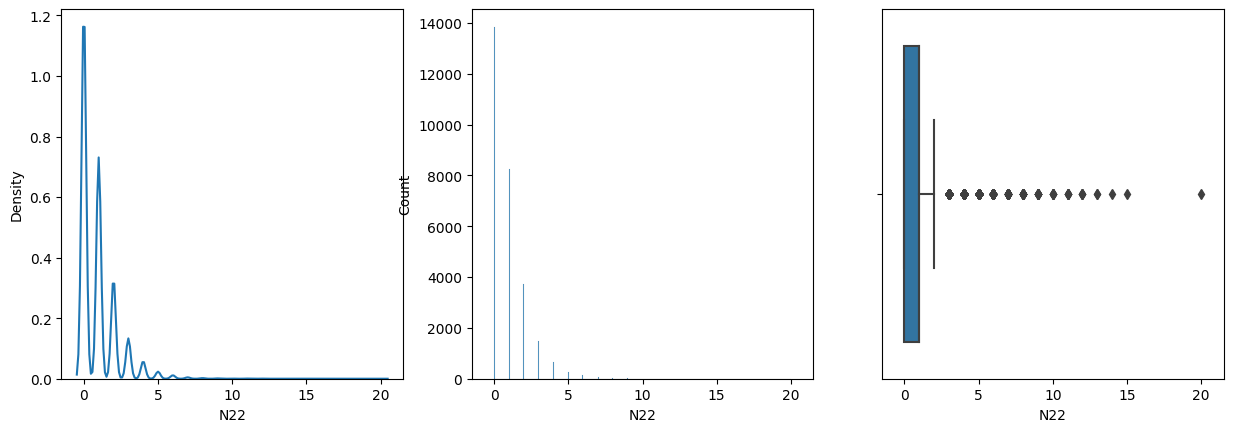

********************************************************************************
N23


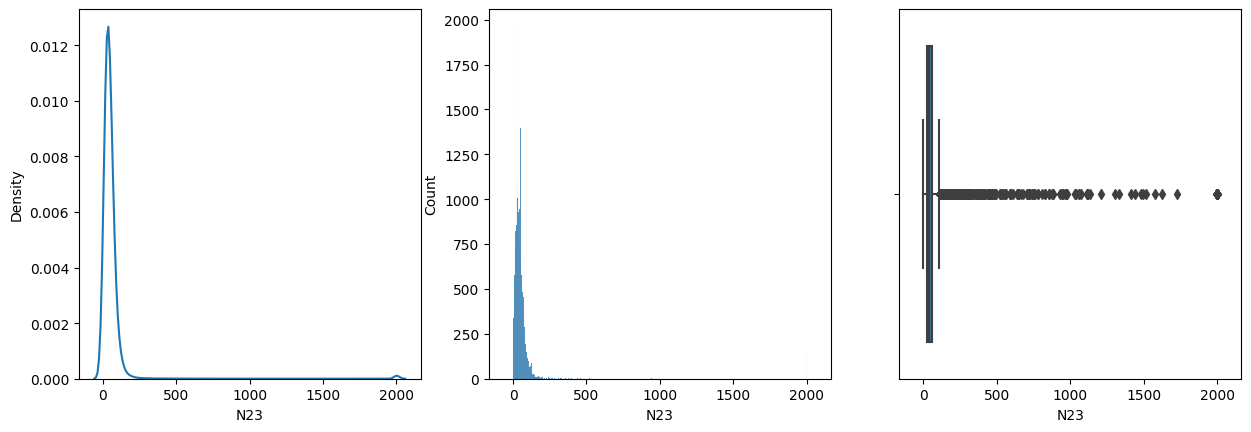

********************************************************************************
N24


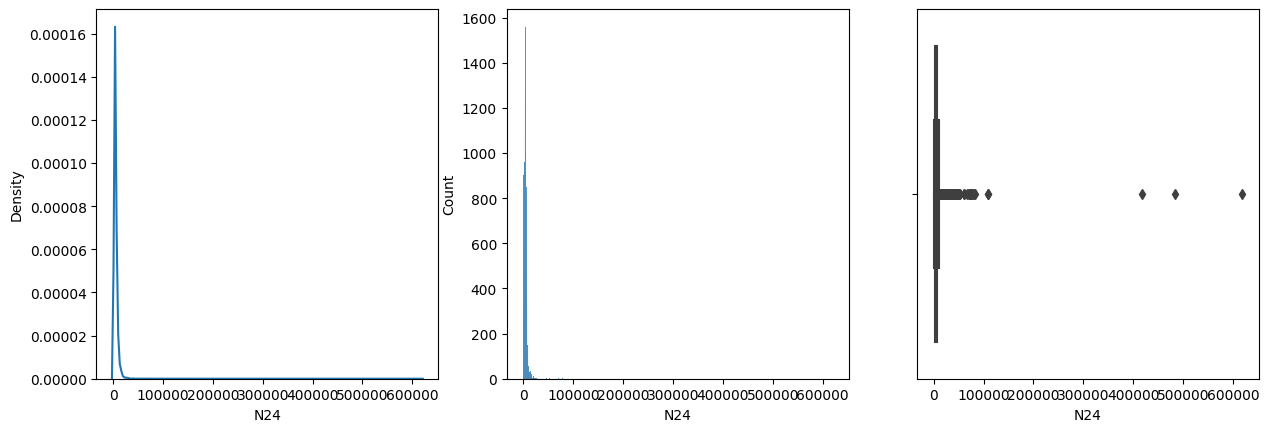

********************************************************************************
N25


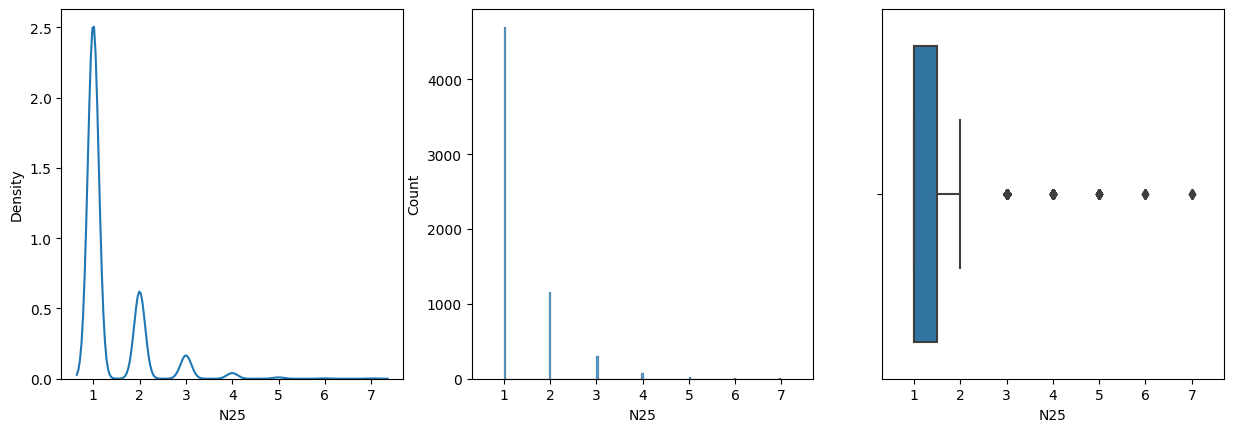

********************************************************************************
N26


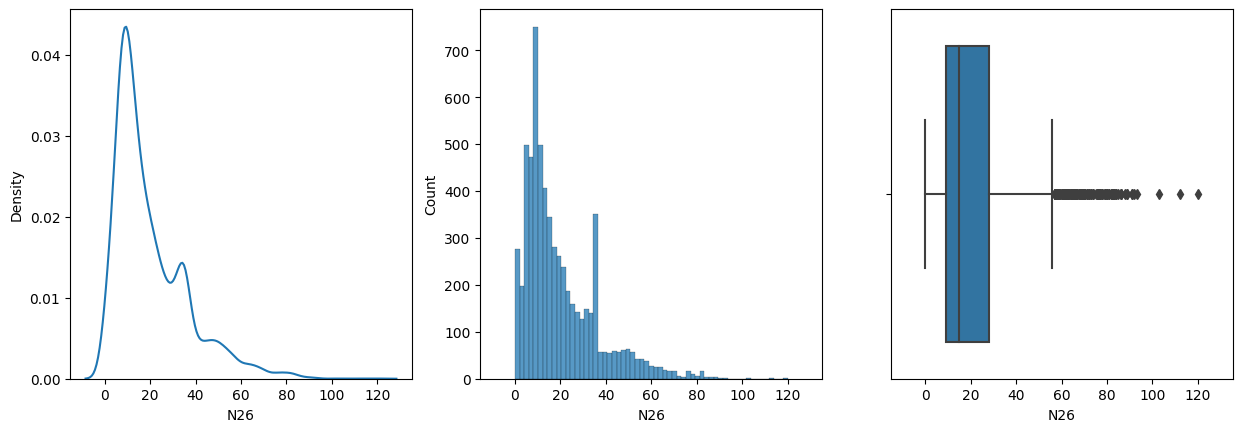

********************************************************************************
N27


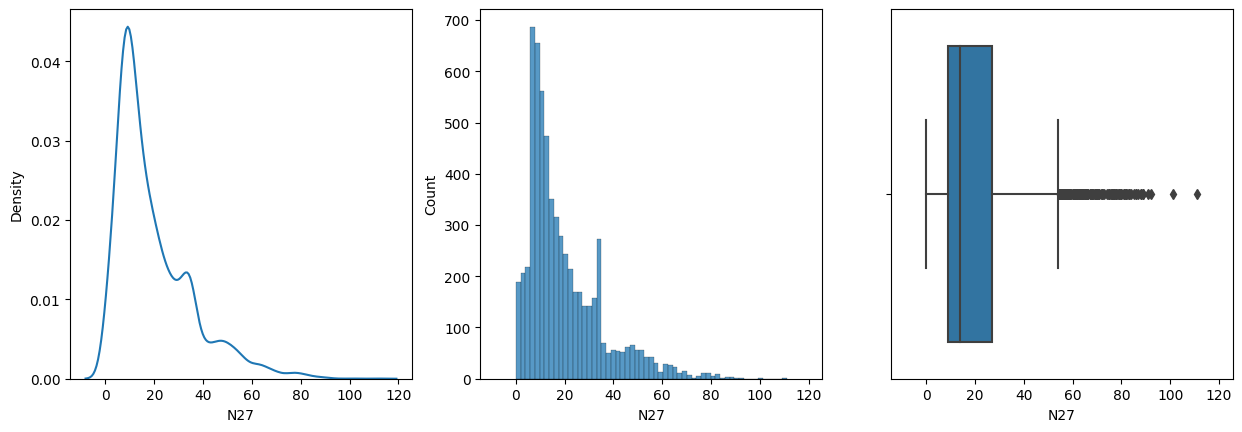

********************************************************************************
N28


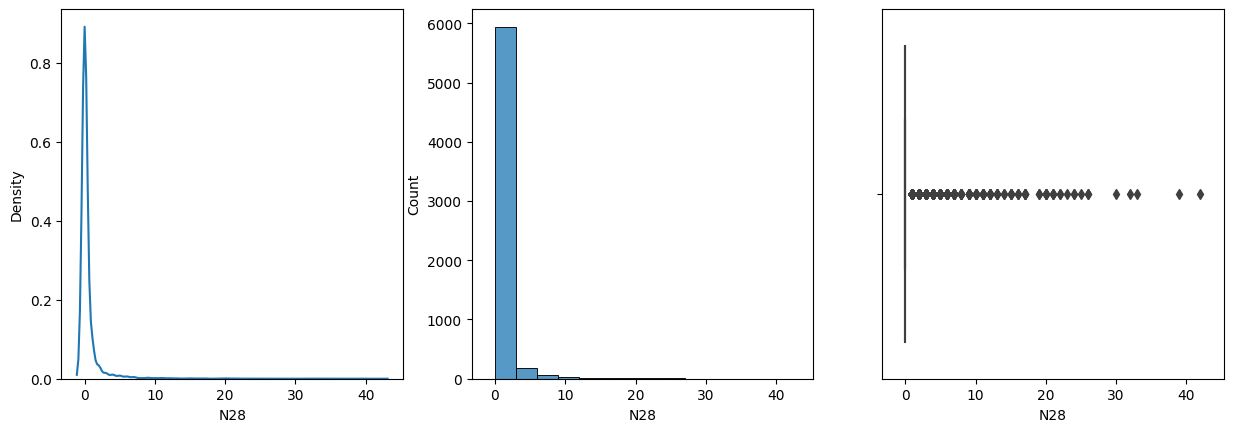

********************************************************************************
N29


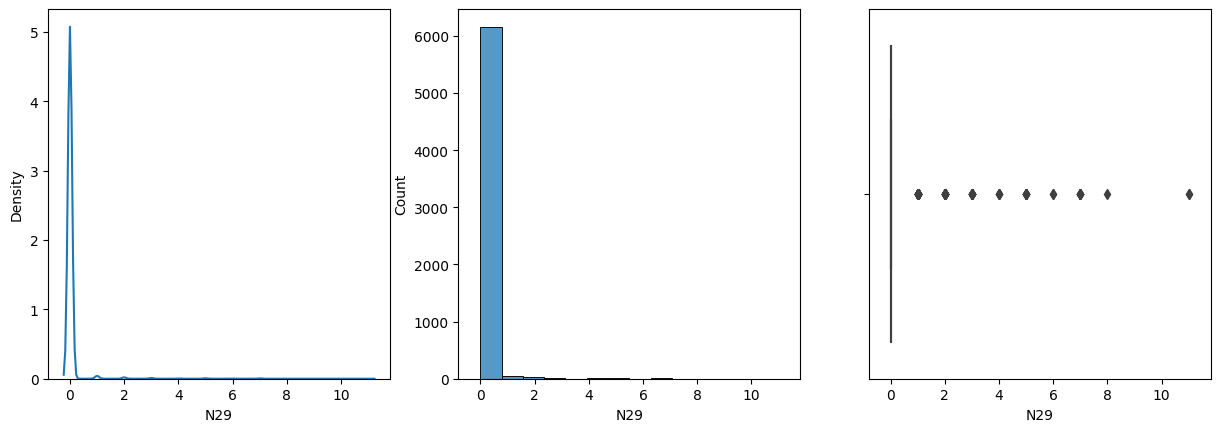

********************************************************************************
N30


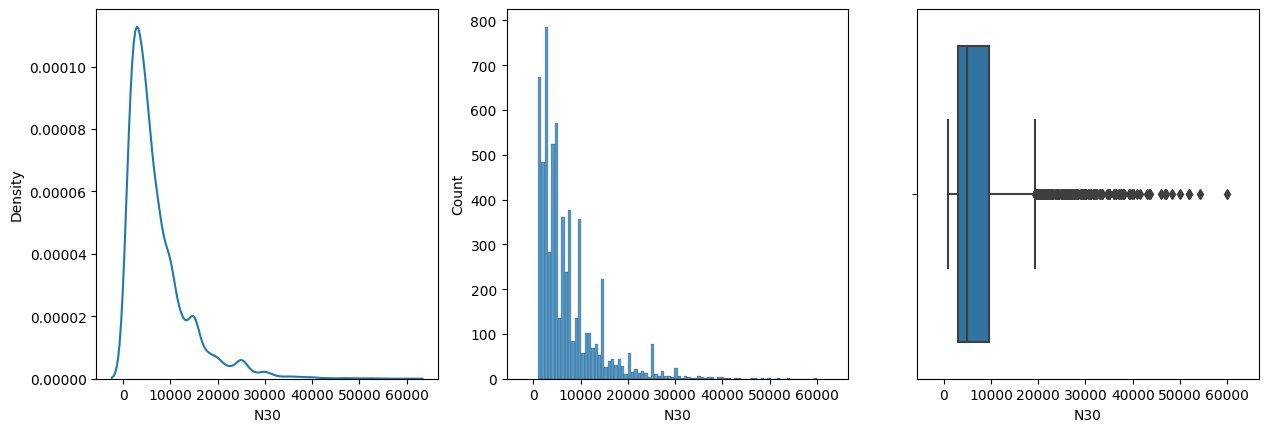

********************************************************************************
N31


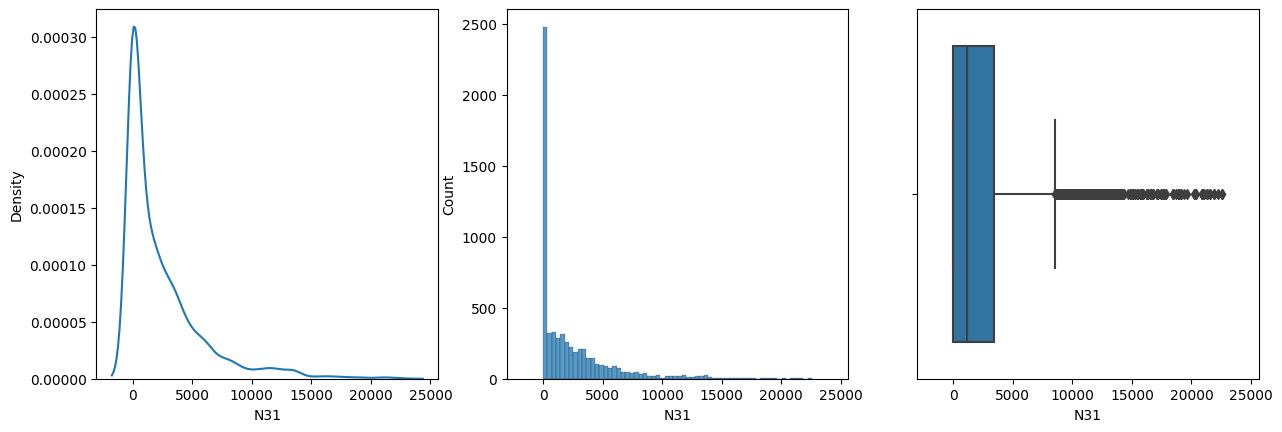

********************************************************************************
N32


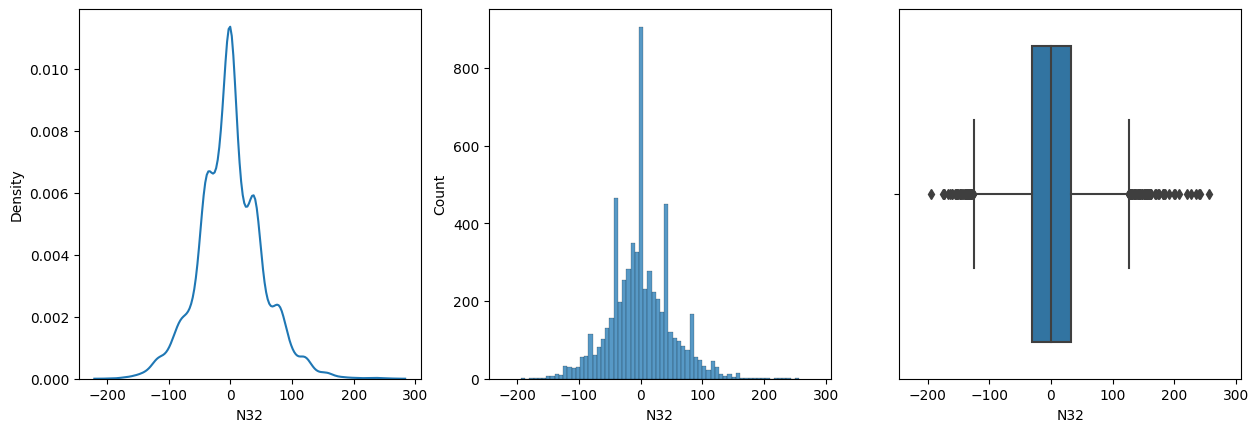

********************************************************************************
N33


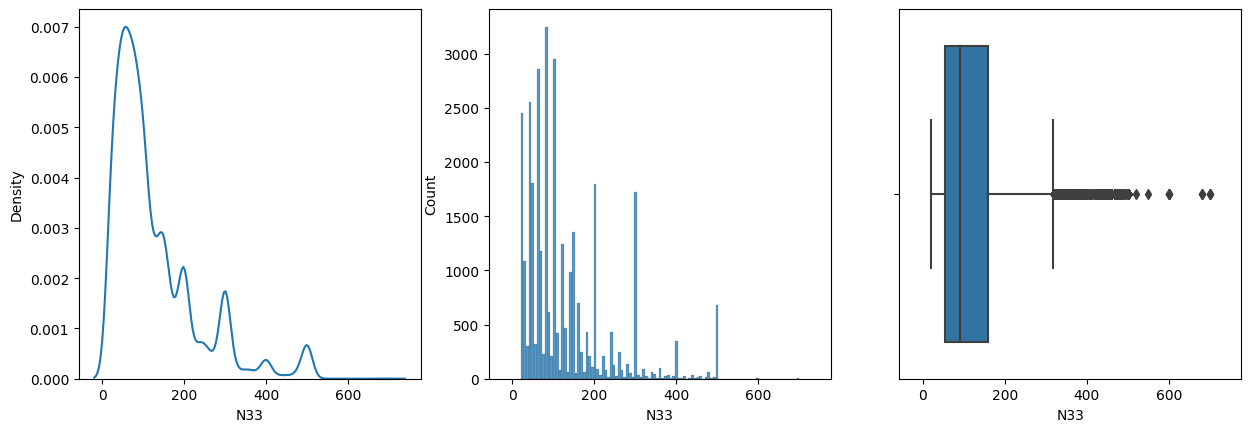

********************************************************************************
N34


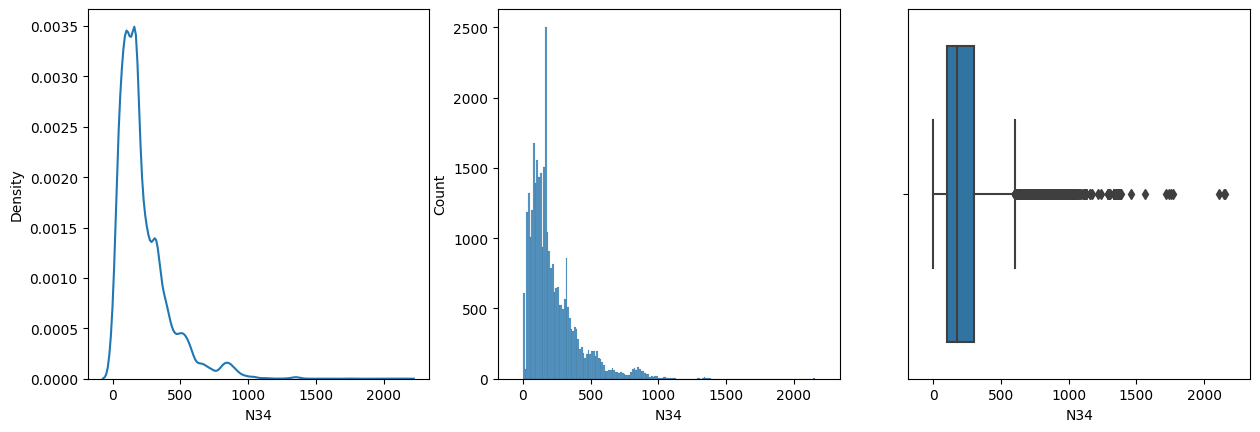

********************************************************************************
N35


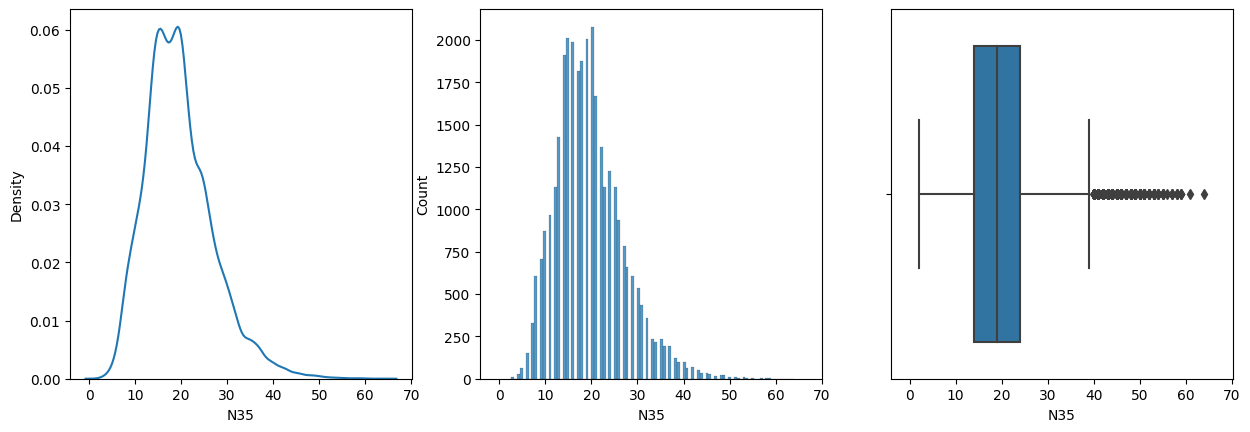

In [12]:
for feat in col:
    if feat.startswith('N'):
        fig , ax = plt.subplots( nrows=1,ncols=3 ,sharex=True)
        print('*'*80)
        print(feat)
        sns.kdeplot(data=X , x=feat , ax=ax[0] )
        sns.histplot(data=X , x=feat , ax = ax[1])
        sns.boxplot(data=X,x=feat,ax=ax[2])
        fig.set_figwidth(15)
        plt.show()

### Multivariate Analysis

n5 n4 n8 highly correlated 
n7,n20 are moderatly corellated   

c8, n23 are negatively correlated


Note to observe : there is no high Correlation with any feature with target feature this could mean there is no linear realted relation, So most likely Complex models can capture the decision boundary

In [13]:
df = pd.merge(X,y, on='Unique_ID')

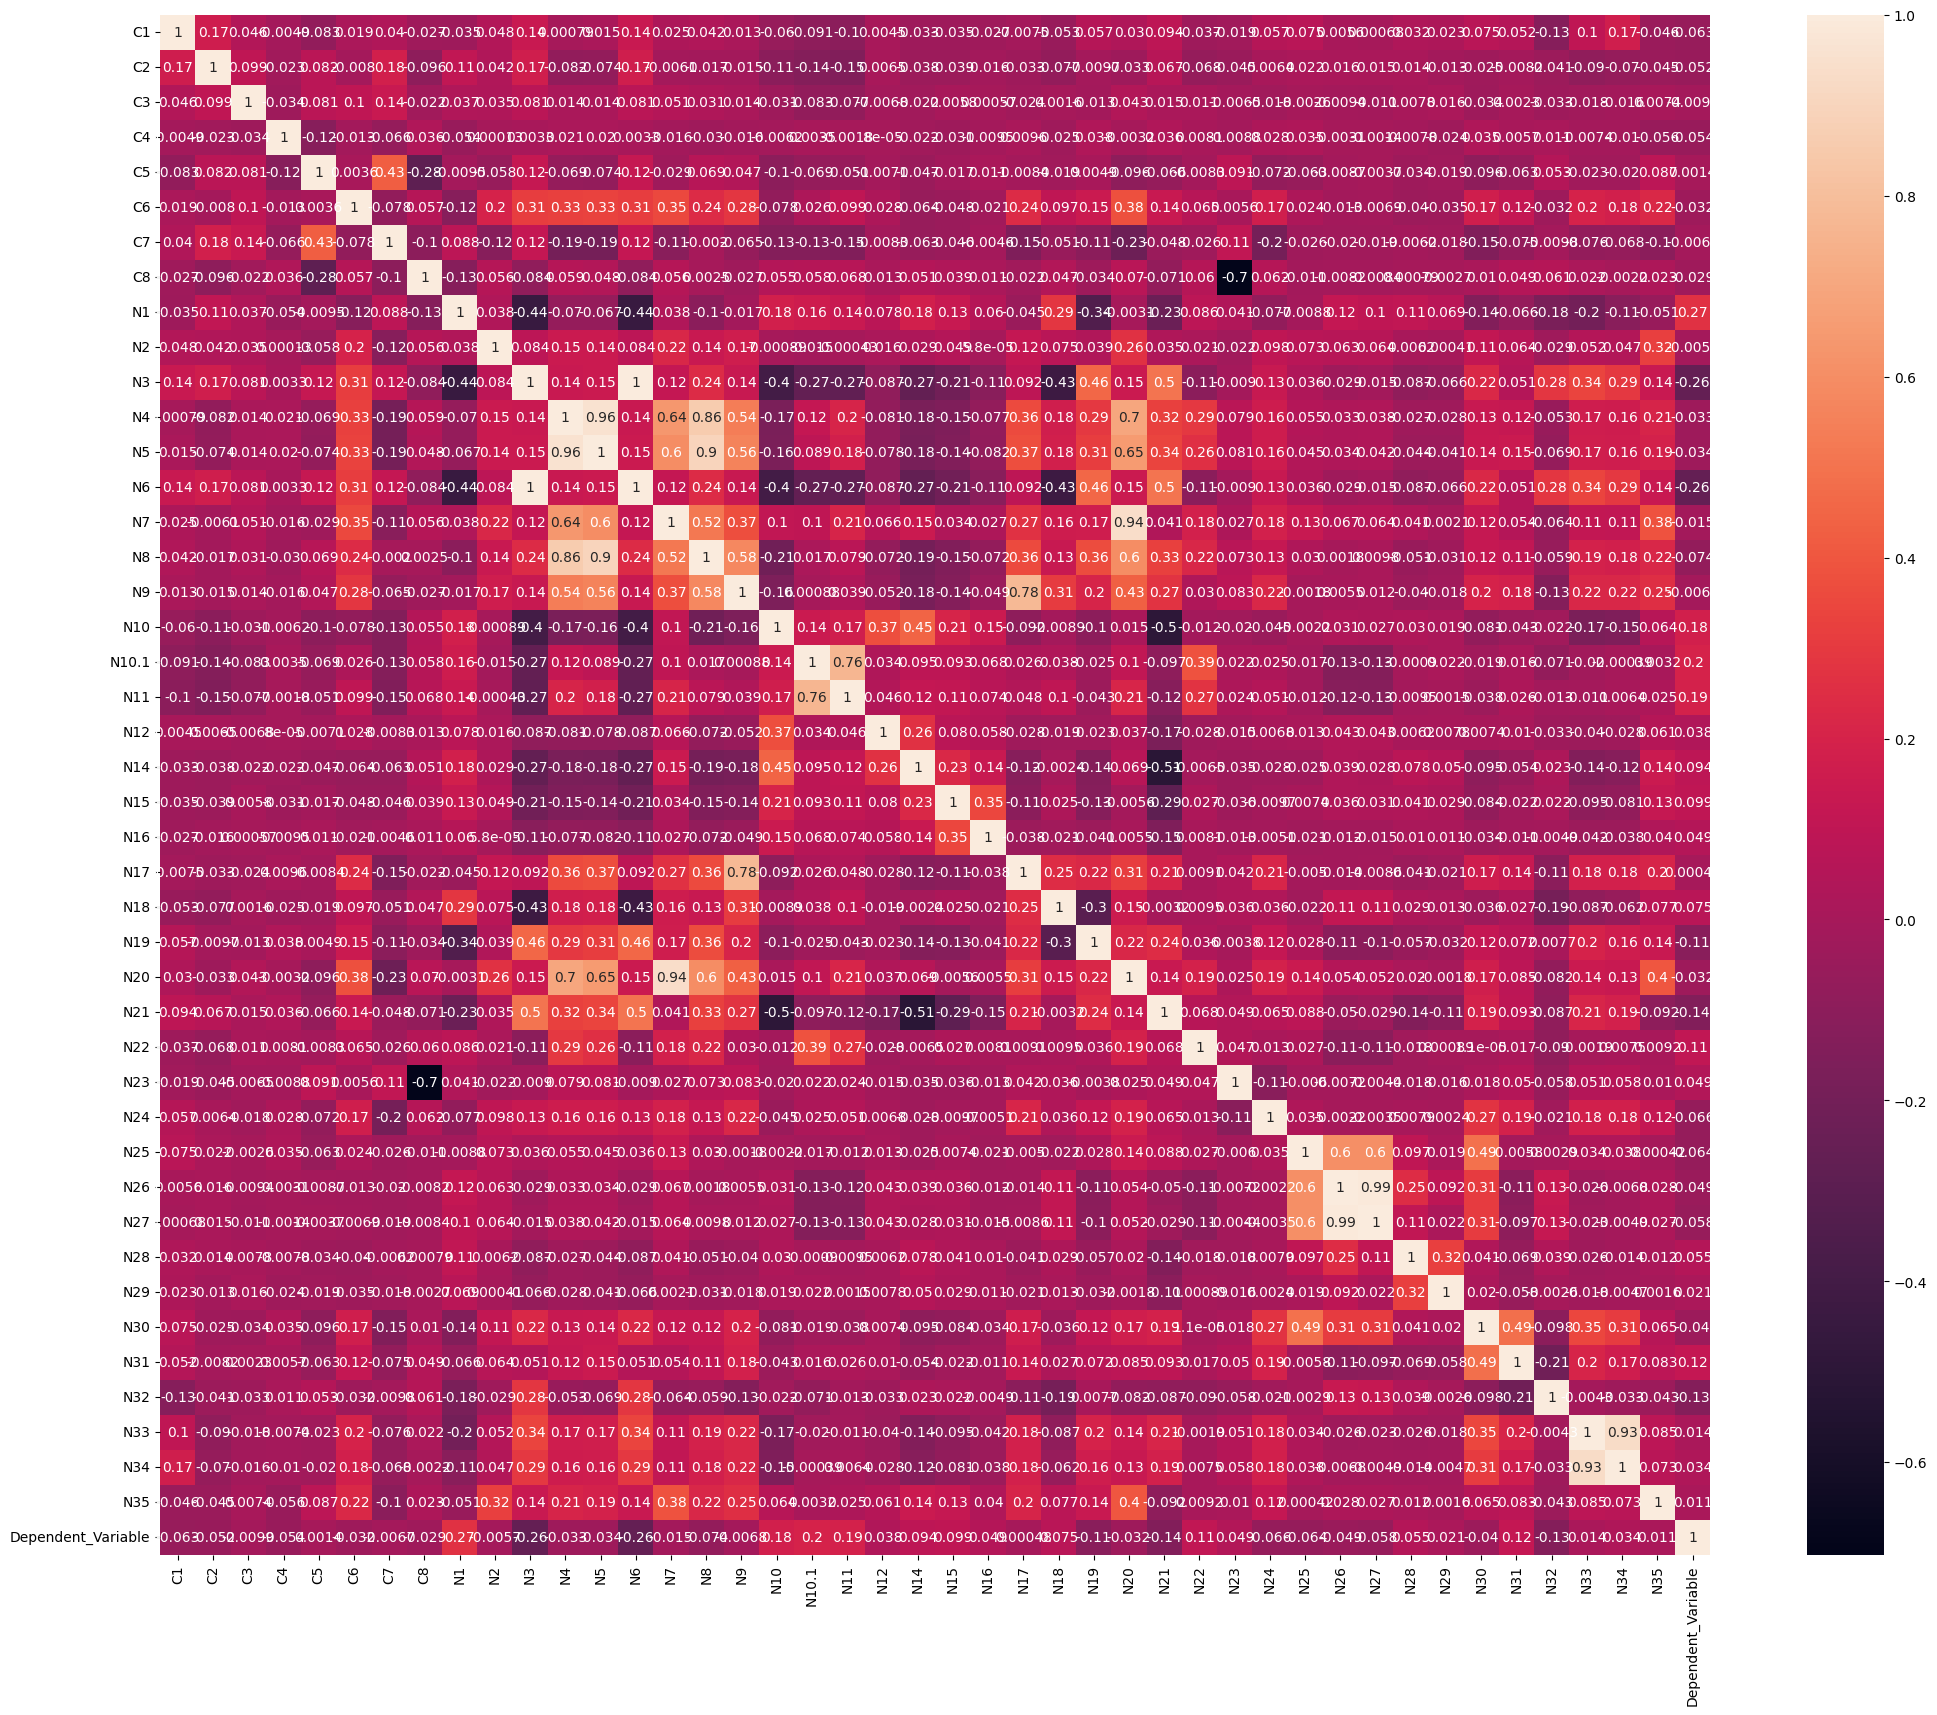

In [14]:
correlation = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(25, 20)
sns.heatmap(data=correlation,annot=True)
plt.show()

## Model Building

### Test Train Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=30)

In [16]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((23135, 43), (9915, 43), (23135, 1), (9915, 1), (11017, 43))

#### Columns dropping 

Columns with 2/3 or more missing values and columns which are highly correlated are removed so that multi collinearity effect could be reduced

In [17]:
drop_col = ['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32','N5','N8','N7','N20','N23']

In [18]:
X_train = X_train.drop(drop_col,axis=1)
X_val = X_val.drop(drop_col,axis=1)
X_test = X_test.drop(drop_col,axis=1)

In [19]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((23135, 30), (9915, 30), (23135, 1), (9915, 1), (11017, 30))

In [20]:
cat_col, num_col = list(), list()
for el in col:
    if el.startswith('C'):
        cat_col.append(el)
    else:
        num_col.append(el)
num_col = list(set(num_col)-set(drop_col))
print(cat_col, num_col)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'] ['N3', 'N4', 'N1', 'N10.1', 'N9', 'N18', 'N11', 'N16', 'N24', 'N17', 'N10', 'N34', 'N19', 'N35', 'N6', 'N33', 'N22', 'N2', 'N12', 'N21', 'N15', 'N14']


### Data Imputation


Simple Imputer is used due to KNNImputer taking a lot of time to process.
KNN imputer cant be used in production cause for input data sanitising and preprocessing knn imputer step consumes a lot of time(calculating distance of new point with all train data) and memory(all distances)

Smple Imputer with mean is used to find all missing values

note: cat_imputer is redundant as there are no missing categorical values

In [21]:
from sklearn.impute import SimpleImputer

cat_Imputer = SimpleImputer(strategy = 'most_frequent')
num_Imputer = SimpleImputer()

In [22]:
X_train[cat_col] = cat_Imputer.fit_transform(X_train[cat_col])
X_train[num_col] = num_Imputer.fit_transform(X_train[num_col])

X_val[cat_col] = cat_Imputer.transform(X_val[cat_col])
X_val[num_col] = num_Imputer.transform(X_val[num_col])

X_test[cat_col] = cat_Imputer.transform(X_test[cat_col])
X_test[num_col] = num_Imputer.transform(X_test[num_col])

In [23]:
X_train.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
N1       0
N2       0
N3       0
N4       0
N6       0
N9       0
N10      0
N10.1    0
N11      0
N12      0
N14      0
N15      0
N16      0
N17      0
N18      0
N19      0
N21      0
N22      0
N24      0
N33      0
N34      0
N35      0
dtype: int64

### Preprocessing features

Scaling numerical with minmaxnormalisation </br>
while Doing onehot encoding on Categoricla values

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [25]:
preprocessor = ColumnTransformer(transformers = [('minmax',MinMaxScaler(), num_col),
                                                 ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_col)],remainder='passthrough')


In [26]:
y_train.value_counts()

Dependent_Variable
0                     15963
1                      7172
dtype: int64

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='saga',class_weight = {0:1,1:2.23})
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelLR', modelLR)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelLR',
                 LogisticRegression(clas

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "modelLR__penalty" :['l1','l2'],
        "modelLR__C": [0.1, 1.0, 10.0,100.0],
    }
]

####  Hyperparameter tunning

##### best paramters with gridsearch

logistric regression performs well with C value with 10 and lasso penlaty with auc in validation 0.76

In [29]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, verbose=1,n_jobs=-1,scoring='roc_auc')
grid_search.fit(X_train, y_train['Dependent_Variable'])

print(f"Best params:")
print(grid_search.best_params_)
print("Best score in grid search:")
print(grid_search.best_score_)
print("best logistic regression from grid search:")
print(grid_search.score(X_val, y_val['Dependent_Variable']))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params:
{'modelLR__C': 10.0, 'modelLR__penalty': 'l1'}
Best score in grid search:
0.7533458530973611
best logistic regression from grid search:
0.760665947723983


/Users/harinadhkunapareddy/opt/anaconda3/envs/ttest/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Random Forrest

In [30]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(class_weight = {0:1,1:2.23},n_jobs=-1)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelRF', modelRF)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelRF',
                 RandomForestClassifier(

In [31]:
param_grid = [
    {
        "modelRF__n_estimators" :[100,200,500,1000],
        "modelRF__oob_score": [True,False],
        "modelRF__min_samples_split": [2,4]
        
    }
]

#### Hyperparameter tunning
##### best params

for min_samples 4 n estimators 1000 random forrest gives auc on validation as 0.768

In [32]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, verbose=1,n_jobs=-1,scoring='roc_auc')
grid_search.fit(X_train, y_train['Dependent_Variable'])

print(f"Best params:")
print(grid_search.best_params_)
print("Best score in grid search:")
print(grid_search.best_score_)
print("best Random Forest from grid search:")
print(grid_search.score(X_val, y_val['Dependent_Variable']))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params:
{'modelRF__min_samples_split': 4, 'modelRF__n_estimators': 1000, 'modelRF__oob_score': False}
Best score in grid search:
0.7684360168865266
best Random Forest from grid search:
0.7689277372551572


### XGboost 

In [33]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(n_jobs= -1)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelXGB', modelXGB)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelXGB'...
                               gamma=

In [34]:
param_grid = [
    {
        "modelXGB__n_estimators" :[100,200,500,1000],
        "modelXGB__max_depth": [2,5,10]        
    }
]

#### Hyperparameter tunning
##### best params with gridsearch


for max depth 2 and n estimators 200 as hyperparamters model performs with auc score of 0.77 under validation

In [35]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, verbose=1,n_jobs=-1,scoring='roc_auc')
grid_search.fit(X_train, y_train['Dependent_Variable'])

print(f"Best params:")
print(grid_search.best_params_)
print("Best score in grid search:")
print(grid_search.best_score_)
print("best XGboost from grid search:")
print(grid_search.score(X_val, y_val['Dependent_Variable']))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params:
{'modelXGB__max_depth': 2, 'modelXGB__n_estimators': 200}
Best score in grid search:
0.7648104354684302
best XGboost from grid search:
0.7704858668558641


## Tunned models and Classification Report

### Logistic regression

In [40]:
modelLR = LogisticRegression(solver='saga',class_weight = {0:1,1:2.23},C=10,penalty='l1',max_iter=1000)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelLR', modelLR)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelLR',
                 LogisticRegression(C=10

In [49]:
model_pipeline.fit(X_train,y_train['Dependent_Variable'])

y_pred_proba = model_pipeline.predict_proba(X_train)
y_predict = model_pipeline.predict(X_train)

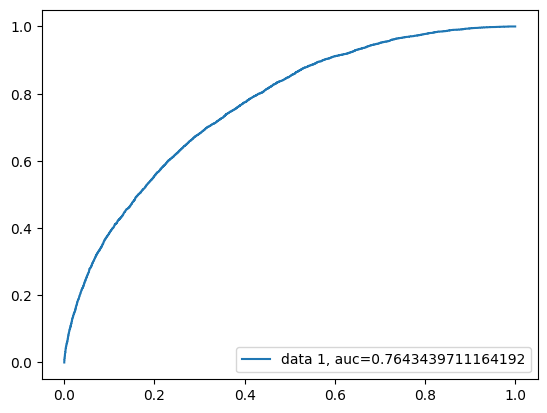

              precision    recall  f1-score   support

           0       0.84      0.68      0.75     15963
           1       0.50      0.70      0.58      7172

    accuracy                           0.69     23135
   macro avg       0.67      0.69      0.67     23135
weighted avg       0.73      0.69      0.70     23135



In [52]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_train['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_train['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_train['Dependent_Variable'],  y_predict))

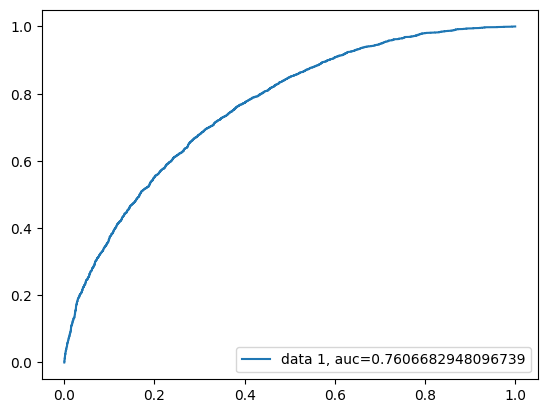

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      6881
           1       0.49      0.70      0.58      3034

    accuracy                           0.69      9915
   macro avg       0.66      0.69      0.66      9915
weighted avg       0.73      0.69      0.70      9915



In [53]:
y_pred_proba = model_pipeline.predict_proba(X_val)
y_predict = model_pipeline.predict(X_val)


fpr, tpr, _ = metrics.roc_curve(y_val['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_val['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_val['Dependent_Variable'],  y_predict))

#### Report and Comments

    1. On train auc is 0.764 and validation 0.760
    2. As data being unbalanced the class 1 which is a minority class been effected with low precession but recall is decent

### Random Forrest

In [60]:
modelRF = RandomForestClassifier(class_weight = {0:1,1:2.23},n_jobs=-1,min_samples_split=4,n_estimators=1000)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelRF', modelRF)])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelRF',
                 RandomForestClassifier(

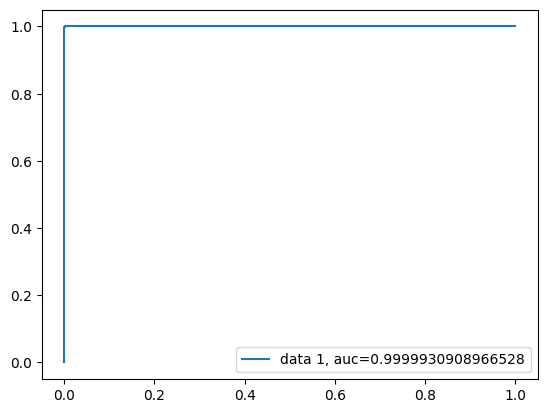

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15963
           1       1.00      1.00      1.00      7172

    accuracy                           1.00     23135
   macro avg       1.00      1.00      1.00     23135
weighted avg       1.00      1.00      1.00     23135



In [58]:
model_pipeline.fit(X_train,y_train['Dependent_Variable'])

y_pred_proba = model_pipeline.predict_proba(X_train)
y_predict = model_pipeline.predict(X_train)

fpr, tpr, _ = metrics.roc_curve(y_train['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_train['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_train['Dependent_Variable'],  y_predict))

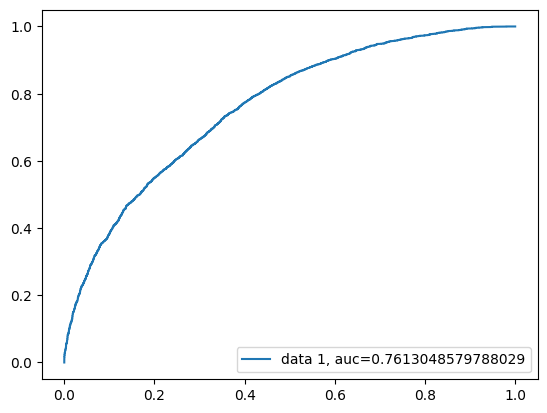

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      6881
           1       0.65      0.36      0.46      3034

    accuracy                           0.74      9915
   macro avg       0.71      0.64      0.65      9915
weighted avg       0.73      0.74      0.72      9915



In [59]:
y_pred_proba = model_pipeline.predict_proba(X_val)
y_predict = model_pipeline.predict(X_val)


fpr, tpr, _ = metrics.roc_curve(y_val['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_val['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_val['Dependent_Variable'],  y_predict))

#### Report and comments:

    1. There is high different between train auc and val auc while train auc is 1
    2. This model has over fitted and cannot be used for any analysis
    3. For validation recal for minority class is very low

### XGboost

In [61]:
modelXGB = XGBClassifier(n_jobs= -1,max_depth=2,n_estimators=200)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('modelXGB', modelXGB)])
model_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['N3', 'N4', 'N1', 'N10.1',
                                                   'N9', 'N18', 'N11', 'N16',
                                                   'N24', 'N17', 'N10', 'N34',
                                                   'N19', 'N35', 'N6', 'N33',
                                                   'N22', 'N2', 'N12', 'N21',
                                                   'N15', 'N14']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8'])])),
                ('modelXGB'...
                               gamma=

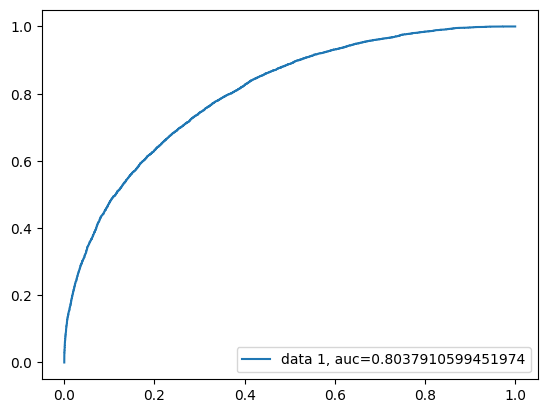

              precision    recall  f1-score   support

           0       0.78      0.92      0.85     15963
           1       0.71      0.42      0.53      7172

    accuracy                           0.77     23135
   macro avg       0.74      0.67      0.69     23135
weighted avg       0.76      0.77      0.75     23135



In [62]:
model_pipeline.fit(X_train,y_train['Dependent_Variable'])

y_pred_proba = model_pipeline.predict_proba(X_train)
y_predict = model_pipeline.predict(X_train)

fpr, tpr, _ = metrics.roc_curve(y_train['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_train['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_train['Dependent_Variable'],  y_predict))

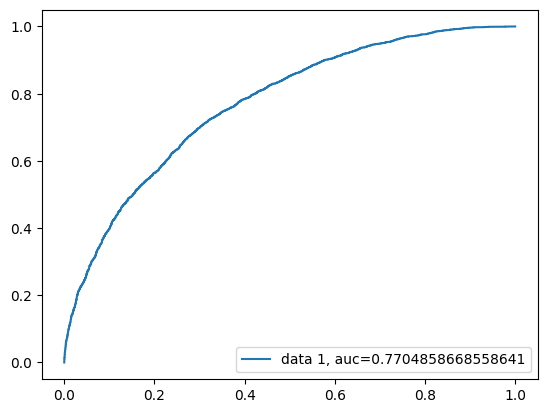

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      6881
           1       0.65      0.38      0.48      3034

    accuracy                           0.75      9915
   macro avg       0.71      0.65      0.66      9915
weighted avg       0.73      0.75      0.73      9915



In [63]:
y_pred_proba = model_pipeline.predict_proba(X_val)
y_predict = model_pipeline.predict(X_val)


fpr, tpr, _ = metrics.roc_curve(y_val['Dependent_Variable'],y_pred_proba[::,1])
auc = metrics.roc_auc_score(y_val['Dependent_Variable'],y_pred_proba[::,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(metrics.classification_report(y_val['Dependent_Variable'],  y_predict))

#### Report and Comments:

    1. The train auc and val auc is almost near and better than rest of the models
    2. The recall score of minority class is low but precession is decent and f1 is low
    3. This model cannot be used for production due to bad metrics

In [96]:
a = model_pipeline['modelXGB'].get_booster().feature_names
a

[ 10 167   2  25]


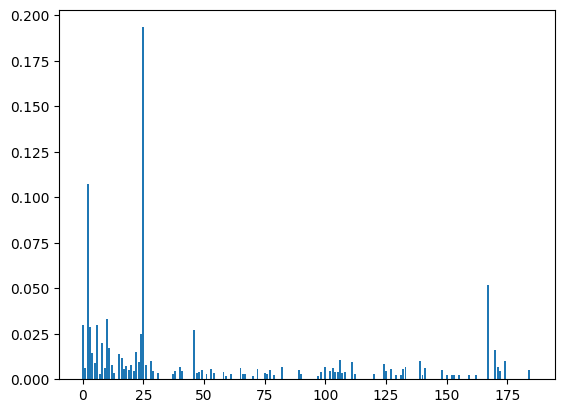

In [90]:
temp = model_pipeline['modelXGB'].feature_importances_
 
print(np.argpartition(temp, -4)[-4:])
plt.bar(range(len(temp)), temp)
plt.show()

### Import features :

    1. pipeline didnt store name as onehot encoding does change it to sparse matrix
    2. 10,167,2,25 are features which contributed model success

In [66]:
y_pred_proba = model_pipeline.predict_proba(X_test)[::,1]


In [74]:
X_test['Class_1_Probability']= y_pred_proba

In [75]:
X_test.reset_index(level=0,inplace=True)

In [77]:
sub = X_test[['Unique_ID','Class_1_Probability']]

In [83]:
sub.to_csv('Test/final_predictions.csv',index=False)